In [1]:
from datasets import PICNN_FNLVQR_Banana
import torch

In [2]:
synthetic_dataset = PICNN_FNLVQR_Banana()
X_train, y_train = synthetic_dataset.sample_joint(n_points=10**5)
tensor_dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=1024)

In [3]:
from pushforward_operators import AmortizedNeuralQuantileRegression
from classes import TrainParameters

In [4]:
quantile = AmortizedNeuralQuantileRegression(
    feature_dimension=1,
    response_dimension=2,
    hidden_dimension=8,
    number_of_hidden_layers=4,
)

train_parameters = TrainParameters(
    number_of_epochs_to_train=10,
    optimizer_parameters=dict(
        lr=1e-2,
        weight_decay=1e-4
    ),
    scheduler_parameters=dict(
        eta_min=0
    ),
    verbose=True,
    warmup_iterations=2
)

In [5]:
_ = quantile.fit(
    dataloader=dataloader,
    train_parameters=train_parameters,
    number_of_rectifying_operations=1,
)

Warm up iteration: 2 Potential loss: 0.054, Amortization loss: 0.071: 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]
Epoch: 10, Potential Objective: 1.486, Amortization Objective: 0.573, Potential LR: 0.000000, Amortized LR: 0.000302: 100%|██████████| 10/10 [01:05<00:00,  6.53s/it]


In [ ]:
# path_for_models_weights = "../attic/models/amortized_neural_quantile/amortized_neural_quantile_banana.pth"
# quantile.save(path=path_for_models_weights)
# quantile = FlowMatchingQuantile.load_class(path=path_for_models_weights).eval()

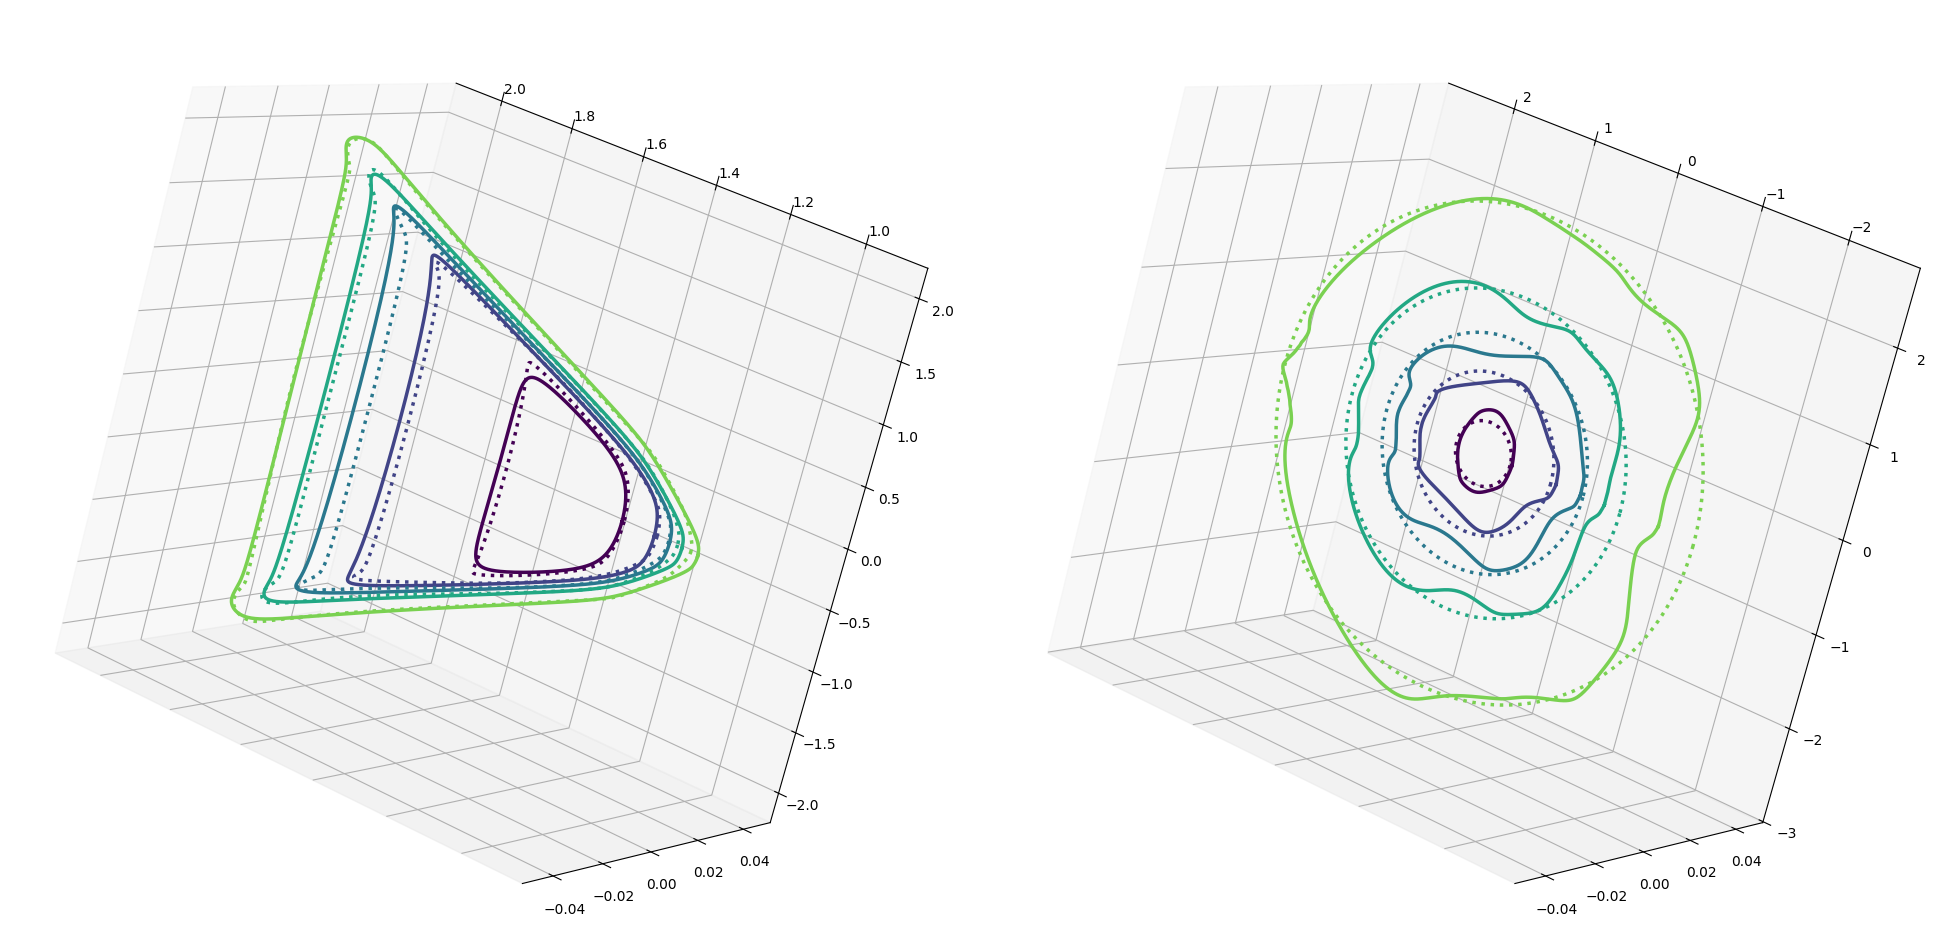

In [ ]:
from utils.plot import plot_quantile_levels_from_dataset

plot_quantile_levels_from_dataset(
    model=quantile, dataset=synthetic_dataset, conditional_value=torch.Tensor([[1.6]]),
    number_of_quantile_levels=5, tensor_parameters={}
)